# 3rd Project in Applied Machine Learning


> Michail Vazaios <br />
> p3170013 <br />
> Email: mich.vaz.99@gmail.com <br />

## Notes

* Some pieces of code take a lot to run (as someone would expect). Some of these may also make your screen to freeze for a second or two.
* In many places in my code I save data in the disk to use them later instead of reading and preprocessing the same initial data multiple times. You may not want to do all this saving to the disk if you read and run this code in a single afternoon without breaks.
* This is a classification of speeches made by political parties. I try to be objective, but due to the nature of the assignment, there may be some (unintended) subjectivity (more than in a usual problem) because of my political opinions (probably the same applies to other projects as well). So I advise the reader to keep this in mind while reading the notebook.

## Data Exploration
* Firstly we need to import some libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

* We read the csv file containing our data:

In [67]:
data_vouli = pd.read_csv("Greek_Parliament_Proceedings_1989_2019.csv")
data_vouli.head()

member_name sitting_date parliamentary_period  \
0  κρητικος νικολαου παναγιωτης   1989-07-03             period 5   
1  κρητικος νικολαου παναγιωτης   1989-07-03             period 5   
2  κρητικος νικολαου παναγιωτης   1989-07-03             period 5   
3                           NaN   1989-07-03             period 5   
4  κρητικος νικολαου παναγιωτης   1989-07-03             period 5   

  parliamentary_session parliamentary_sitting                 political_party  \
0             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
1             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
2             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
3             session 1             sitting 1                           βουλη   
4             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   

   speaker_info                                             speech  
0    προεδρευων   Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...  
1    προεδρευων   Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...  
2    προεδρευων   Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ...  
3  βουλευτης/ες                                  Μάλιστα, μάλιστα.  
4    προεδρευων   Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...

* We can see that people who talk in the parliament can be people like the "προεδερευων" who mostly say stuff like "Please mr/mrs Name, come and talk", "Please, silence", etc.
* Let's see what values the speaker info can take, and how frequent each value is:

In [68]:
data_vouli["speaker_info"].value_counts()

προεδρευων                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

* We see that the "προεδρευων" and "προεδρος" speak quite often.
* We won't take into account such speeches, since they are almost the same no matter the party and they don't represent a party's views or plans.

In [69]:
data_vouli.drop(data_vouli[(data_vouli["speaker_info"]=="προεδρευων") | 
                           (data_vouli["speaker_info"]=="προεδρος")].index, inplace=True)
data_vouli.shape

(781780, 8)

* We can also see that there are some occasions were the speech has been counted as `speaker_info`. We won't be counting these speeches as well. Most of these will probably have too short texts for the `speech` field.
* We generally want to delete speeches that are too short, since it is very probable that they are not actual speeches, but someone interrupting someone other, or a person who is not normally "προεδρευων" acting as "προεδρευων".
* So we create another column with the length of each speech (in letters, spaces, ...) and plot a histogram of the lengths.

(array([7.76431e+05, 5.10100e+03, 2.11000e+02, 2.30000e+01, 2.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([1.000000e+00, 1.369250e+04, 2.738400e+04, 4.107550e+04,
        5.476700e+04, 6.845850e+04, 8.215000e+04, 9.584150e+04,
        1.095330e+05, 1.232245e+05, 1.369160e+05]),
 <BarContainer object of 10 artists>)

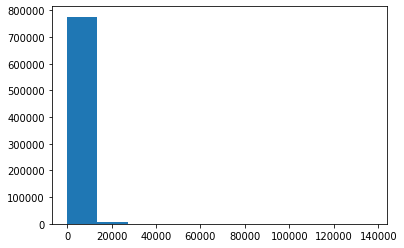

In [70]:
data_vouli["length"] = data_vouli["speech"].str.len()
plt.hist(data_vouli["length"], label="Length of speeches (in letters)")

* We can see that there too many short speeches
* So we check for too short speeches:

(array([217542., 124289.,  55842.,  29321.,  18158.,  13196.,  10551.,
          8780.,   7671.,   6826.,   6046.,   5670.,   5240.,   4968.,
          4594.,   4316.,   4084.,   3857.,   3645.,   3587.]),
 array([  1.  ,  25.95,  50.9 ,  75.85, 100.8 , 125.75, 150.7 , 175.65,
        200.6 , 225.55, 250.5 , 275.45, 300.4 , 325.35, 350.3 , 375.25,
        400.2 , 425.15, 450.1 , 475.05, 500.  ]),
 <BarContainer object of 20 artists>)

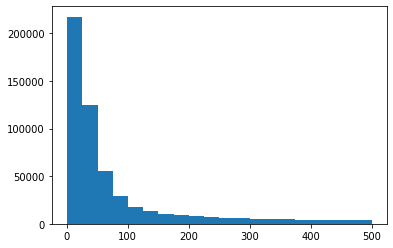

In [71]:
short = data_vouli[data_vouli["length"] <= 500]
plt.hist(short["length"], bins=20, label="Length of short speeches")

* We sample from the shorter of these short speeches:

In [72]:
short[["speech", "length"]][short["length"]<=100].sample(20)

speech  length
811742                                            «ΠΑΡΩΝ».     9.0
1061738                                      Δεκτό, δεκτό.    14.0
841535     Είπε ότι είναι εναντίον της εθνικής κυριαρχίας.    48.0
403627    Εφόσον γίνεται δεκτή, δεν θέλω να ομιλήσω περ...    68.0
201379   Θα ήθελα να πω δύο κουβέντες. Τουλάχιστον να κ...    70.0
355891                                   Συμφωνώ, το είπα.    18.0
310778    Εάν δεν τη δέχεται ο κύριος Υπουργός, δεν επι...    84.0
347920                                       Δεκτή, δεκτή.    14.0
618674    Κύριε συνάδελφε, άλλωστε είναι έμπνευση του Π...    54.0
883649                                            Βεβαίως…     9.0
70877           Εμείς που δεν έχουμε γραφτεί θα μιλήσουμε;    43.0
1092845                                               Όχι.     5.0
860267    Όχι. Να προσέχουμε τι λέμε και μετά να κάνουμ...    72.0
296972                             Αυτό είναι μεγάλο θέμα.    24.0
1027187                                   Κατά πλειοψηφία.    17.0
486012                                           Παρακαλώ.    10.0
710659                           Κάνετε σπέκουλα πολιτική.    26.0
352143                 Πού το λέει αυτό; Διαβάστε τα καλά.    36.0
812195    Να ζητήσετε την παράταση από την Ευρωπαϊκή Έν...    50.0
31408                     Κύριε Πρόεδρε, παρακαλώ το λόγο.    33.0

* From the histogram and the sampling we decide to delete the speeches with length <= 100 characters, since classificating them won't be any better than doing it randomly.

In [73]:
data_vouli.drop(data_vouli[data_vouli["length"] <= 100].index, inplace=True)
data_vouli.shape

(354786, 9)

* We delete columns which we certainly won't need.

In [74]:
data_vouli.drop(["parliamentary_session", "parliamentary_sitting"], axis=1, inplace=True)

* We convert the `parliamentary_period` to a single number for each row:

In [79]:
data_vouli["parliamentary_period"] = data_vouli["parliamentary_period"].str.split().str.get(1)
data_vouli["parliamentary_period"] = pd.to_numeric(data_vouli["parliamentary_period"], errors='coerce')
data_vouli["parliamentary_period"].sample(5)

176326     7
243797     9
767748    13
915807    15
817505    13
Name: parliamentary_period, dtype: int64

* We now check how many times representatives of each party have spoken.

In [80]:
data_vouli["political_party"].value_counts()

πανελληνιο σοσιαλιστικο κινημα                                                     122555
νεα δημοκρατια                                                                     120252
συνασπισμος ριζοσπαστικης αριστερας                                                 34620
κομμουνιστικο κομμα ελλαδας                                                         21545
συνασπισμος της αριστερας των κινηματων και της οικολογιας                          13633
ανεξαρτητοι (εκτος κομματος)                                                         9722
λαικος ορθοδοξος συναγερμος                                                          8393
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)      5023
λαικος συνδεσος - χρυση αυγη                                                         4155
δημοκρατικο κοινωνικο κινημα                                                         3449
δημοκρατικη αριστερα                                                                 2235
ανεξαρτητο

* We see that some parties have spoken too little and that some parties which are the same (or almost the same) appear with multiple names.
* We'll do some changing in the names of the parties to shorten them, and at the same time we will "merge" duplicate party names into one.

In [81]:
data_vouli.loc[data_vouli['political_party'] == "πανελληνιο σοσιαλιστικο κινημα", 
                'political_party'] = "ΠΑΣΟΚ"
data_vouli.loc[data_vouli['political_party'] == "νεα δημοκρατια", 
                'political_party'] = "ΝΔ"
data_vouli.loc[data_vouli['political_party'] == "κομμουνιστικο κομμα ελλαδας", 
                'political_party'] = "ΚΚΕ"
data_vouli.loc[data_vouli['political_party'] == "συνασπισμος της αριστερας των κινηματων και της οικολογιας", 
                'political_party'] = "Συνασπισμος"
data_vouli.loc[data_vouli['political_party'] == "συνασπισμος ριζοσπαστικης αριστερας", 
                'political_party'] = "ΣΥΡΙΖΑ"
data_vouli.loc[data_vouli['political_party'] == "λαικος ορθοδοξος συναγερμος", 
                'political_party'] = "ΛΑΟΣ"
data_vouli.loc[data_vouli['political_party'] == "δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)", 
                'political_party'] = "ΠΑΣΟΚ"
data_vouli.loc[data_vouli['political_party'] == "ανεξαρτητοι ελληνες - πανος καμμενος", 
                'political_party'] = "ΑΝΕΛ"
data_vouli.loc[data_vouli['political_party'] == "ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια", 
                'political_party'] = "ΑΝΕΛ"
data_vouli.loc[data_vouli['political_party'] == "δημοκρατικη αριστερα", 
                'political_party'] = "ΔΗΜΑΡ"
data_vouli.loc[data_vouli['political_party'] == "δημοκρατικο κοινωνικο κινημα", 
                'political_party'] = "ΔΗΚΚΙ"
data_vouli["political_party"].value_counts()

ΠΑΣΟΚ                                                                      127578
ΝΔ                                                                         120252
ΣΥΡΙΖΑ                                                                      34620
ΚΚΕ                                                                         21545
Συνασπισμος                                                                 13633
ανεξαρτητοι (εκτος κομματος)                                                 9722
ΛΑΟΣ                                                                         8393
λαικος συνδεσος - χρυση αυγη                                                 4155
ΑΝΕΛ                                                                         3509
ΔΗΚΚΙ                                                                        3449
ΔΗΜΑΡ                                                                        2235
ενωση κεντρωων                                                               1487
το ποταμι       

* We keep parties which have at least 3 thousand speeches, since for the others there is too little material for our algorithms to learn from.
* Since the assignment asks for the classification of **political parties**, we won't keep independent MPs' speeches.
* For the same reason we won't keep speeches of criminal organisations.

In [82]:
data_vouli = data_vouli[data_vouli["political_party"].isin(["ΠΑΣΟΚ", "ΝΔ", "ΣΥΡΙΖΑ", "ΚΚΕ", 
                                                            "Συνασπισμος", "ΛΑΟΣ", "ΑΝΕΛ", "ΔΗΚΚΙ"])]
data_vouli.shape

(332979, 7)

* We check for na values:

In [83]:
data_vouli.isna().sum()

member_name                729
sitting_date                 0
parliamentary_period         0
political_party              0
speaker_info            218640
speech                       9
length                       9
dtype: int64

* And remove the rows with na values for the speech (or the length since the na values will be in the same rows) or the member name are missing.

In [84]:
data_vouli.dropna(subset=["speech", "member_name"], inplace=True)
data_vouli.shape

(332241, 7)

* We save these values to read less data in the future.
* If you run the notebook only once you may skip the following pieces of code.

In [85]:
data_vouli.to_csv("greek_parliament_shorter.csv", index=False)

In [13]:
data_vouli = pd.read_csv("greek_parliament_shorter.csv")

* We'll now take a look at how active was each party in each parliamentary period. To do this we will find for each parliamentary period the percentage of speeches (out of the total speeches) that each party gave.
* In counting the total speeches we ignore the parties with too little speeches.
* We'll use `groupby`s to do this.

In [14]:
by_both = data_vouli.groupby(["parliamentary_period", "political_party"]).count()[["speech"]]
speeches_per_period = by_both.groupby(["parliamentary_period"]).sum()
by_both

speech
parliamentary_period political_party        
5                    ΚΚΕ                  24
                     ΝΔ                 1339
                     ΠΑΣΟΚ              1444
                     Συνασπισμος         428
6                    ΚΚΕ                  25
...                                      ...
17                   ΑΝΕΛ               1019
                     ΚΚΕ                2784
                     ΝΔ                 9443
                     ΠΑΣΟΚ              5495
                     ΣΥΡΙΖΑ            16029

[61 rows x 1 columns]

In [15]:
speeches_per_period

speech
parliamentary_period        
5                       3235
6                       2141
7                      56069
8                      12227
9                      45090
10                     42432
11                     43978
12                     25952
13                     33830
14                        12
15                     27632
16                      4873
17                     34770

* We see that the 14th parliamentary period was too short, so we delete it and change the next periods from 15, 16, 17 to 14, 15, 16 respectively. This is done to create better plots in the future. It is also done in a ugly way but this is not the main part of the project so we don't care that much about how pretty it is.

In [16]:
data_vouli.drop(data_vouli[data_vouli["parliamentary_period"]==14].index, inplace=True)
data_vouli.loc[data_vouli['parliamentary_period'] == 15, 
                'parliamentary_period'] = 14
data_vouli.loc[data_vouli['parliamentary_period'] == 16, 
                'parliamentary_period'] = 15
data_vouli.loc[data_vouli['parliamentary_period'] == 17, 
                'parliamentary_period'] = 16
by_both = data_vouli.groupby(["parliamentary_period", "political_party"]).count()[["speech"]]
speeches_per_period = by_both.groupby(["parliamentary_period"]).sum()

* We reset the index in the two dataframes we created and use merge to find the percentages of how much each party spoke each period, relative to the total speeches this period.

In [17]:
by_both = by_both.reset_index()
speeches_per_period = speeches_per_period.reset_index()
speeches_per_period.rename(columns={"speech" : "total_speeches"}, inplace=True)
new_by_both = pd.merge(by_both,
                        speeches_per_period,
                        on="parliamentary_period",
                        how='inner')
new_by_both["percentages"] = new_by_both["speech"]/new_by_both["total_speeches"]

* And plot our data:

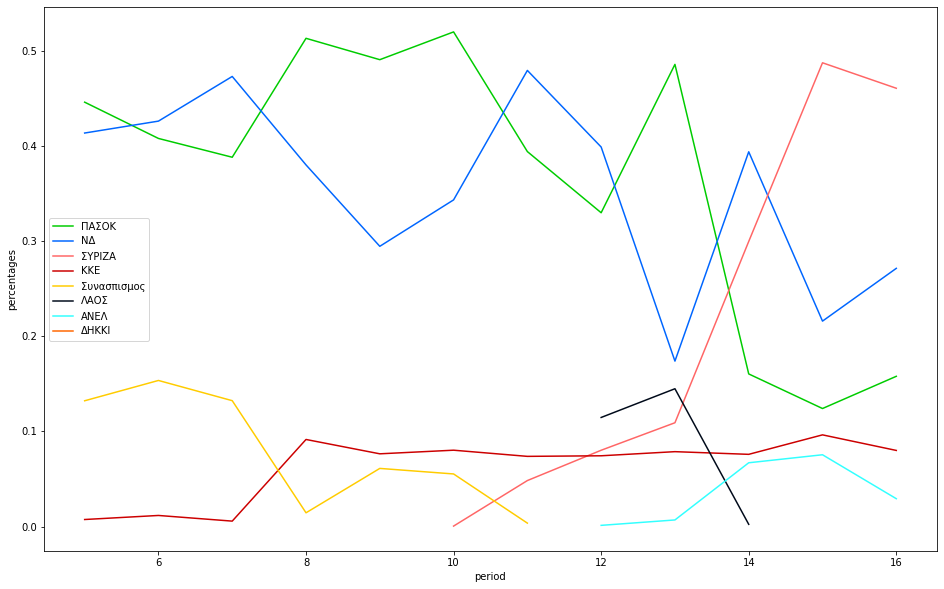

In [18]:
fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

colors = ["#00cc00", "#0066ff", "#ff6666", "#cc0000", "#ffcc00", "#000a1a", "#33ffff", "#ff6600"]
parties = ["ΠΑΣΟΚ", "ΝΔ", "ΣΥΡΙΖΑ", "ΚΚΕ", "Συνασπισμος", "ΛΑΟΣ", "ΑΝΕΛ", "ΔΗΚΚΙ"]
for party, color in zip(parties, colors):
    ax.plot(new_by_both[new_by_both["political_party"]==party]["parliamentary_period"], 
            new_by_both[new_by_both["political_party"]==party]["percentages"], label=party, c=color)

ax.set_xlabel("period")
ax.set_ylabel("percentages")
ax.legend(loc='best')

* We see that the party "ΔΗΚΚΙ" is not on the plot. This is because it participated in the parliament for only one period.
* We will now find the most frequent speakers of the parliament and of each party.
* First we will find the most frequent speakers of the whole parliament. It is possible that a speaker has changed many parties, so additionally we count how many parties (of the eight we decided to deal with) each top-speaker has changed.
* To do this we use `nunique`. We use it for the parties as well as for the speeches but it doesn't under-count the speeches since the probability that two speeches of the same person being exactly the same is extremely low. The only problem is that this is a little slower (still it runs in reasonable time).

In [19]:
speakers = data_vouli.groupby(["member_name"]).nunique()[["speech", "political_party"]]
speakers = speakers.reset_index()
speakers.sort_values(by="speech", ascending=False, inplace=True)
speakers.rename(columns={"speech" : "speeches_given", "political_party" : "parties_changed"}, inplace=True)
speakers.head(10)

member_name  speeches_given  parties_changed
341          κακλαμανης χρηστου αποστολος            4375                1
873       παυλοπουλος βασιλειου προκοπιος            3979                1
582         λαφαζανης γεωργιου παναγιωτης            3743                2
123         βενιζελος βασιλειου ευαγγελος            3092                1
950            σιουφας γεωργιου δημητριος            2934                1
597             λοβερδος νικολαου ανδρεας            2856                1
485            κορακας χρηστου ευστρατιος            2709                2
183  γεωργιαδης αθανασιου σπυριδων-αδωνις            2535                2
978           σουφλιας αθανασιου γεωργιος            2332                1
968               σκυλλακος ηλια αντωνιος            2300                2

* We will now find the top speakers relatively to the total speeches of their party. We work in a similar way as before:

In [20]:
by_party_cand = data_vouli.groupby(["political_party", "member_name"]).count()[["speech"]]
by_party = by_party_cand.groupby(["political_party"]).sum()
by_party_cand = by_party_cand.reset_index()
by_party = by_party.reset_index()
by_party.rename(columns={"speech" : "total_speeches"}, inplace=True)
new_by_party_cand = pd.merge(by_party_cand, by_party, on="political_party", how='inner')
new_by_party_cand["percentages"] = new_by_party_cand["speech"]/new_by_party_cand["total_speeches"]
new_by_party_cand.drop(columns=["total_speeches"], inplace=True)
new_by_party_cand.rename(columns={"speech" : "speeches"}, inplace=True)
new_by_party_cand.sort_values(by="percentages", ascending=False, inplace=True)
new_by_party_cand.head()

political_party                       member_name  speeches  percentages
37            ΔΗΚΚΙ   τσοβολας κωνσταντινου δημητριος       992     0.287620
113            ΛΑΟΣ       ροντουλης γεωργιου αστεριος      2135     0.268655
36            ΔΗΚΚΙ        τσαφουλιας ανδρεα γεωργιος       599     0.173674
9              ΑΝΕΛ  καμμενος ηλια παναγιωτης (πανος)       582     0.165859
105            ΛΑΟΣ      καρατζαφερης ιωαννη γεωργιος      1076     0.135397

* And the top-5 most frequent speakers of each party:

In [21]:
parties = ["ΠΑΣΟΚ", "ΝΔ", "ΣΥΡΙΖΑ", "ΚΚΕ", "Συνασπισμος", "ΛΑΟΣ", "ΑΝΕΛ", "ΔΗΚΚΙ"]
top_5_by_party = pd.DataFrame(columns=["political_party", "member_name", "speeches", "percentages"])
for party in parties:
    tmp = new_by_party_cand[new_by_party_cand["political_party"]==party].head(5)
    top_5_by_party = top_5_by_party.append(tmp)
top_5_by_party.sort_values(by=["political_party", "percentages"], ascending=[True, False], inplace=True)
top_5_by_party

political_party                             member_name speeches  \
9               ΑΝΕΛ        καμμενος ηλια παναγιωτης (πανος)      582   
28              ΑΝΕΛ             χρυσοβελωνη γεωργιου μαρινα      309   
10              ΑΝΕΛ         καμμενος κωνσταντινου δημητριος      291   
26              ΑΝΕΛ  παπαχριστοπουλος θεμιστοκλη αθανασιος       281   
3               ΑΝΕΛ     γιοβανοπουλος γεωργιου κωνσταντινος      275   
37             ΔΗΚΚΙ         τσοβολας κωνσταντινου δημητριος      992   
36             ΔΗΚΚΙ              τσαφουλιας ανδρεα γεωργιος      599   
35             ΔΗΚΚΙ                ροκος δημητριου γεωργιος      379   
32             ΔΗΚΚΙ              ιντζες γεωργιου αναστασιος      348   
33             ΔΗΚΚΙ               καρακωστας μιχαηλ ιωαννης      306   
44               ΚΚΕ               γκατζης φιλιππου νικολαος     2000   
85               ΚΚΕ                 σκυλλακος ηλια αντωνιος     1775   
60               ΚΚΕ              κορακας χρηστου ευστρατιος     1426   
52               ΚΚΕ      κανελλη χρηστου γαρυφαλλια (λιανα)     1308   
82               ΚΚΕ            παφιλης σπυριδωνος αθανασιος     1283   
113             ΛΑΟΣ             ροντουλης γεωργιου αστεριος     2135   
105             ΛΑΟΣ            καρατζαφερης ιωαννη γεωργιος     1076   
102             ΛΑΟΣ    γεωργιαδης αθανασιου σπυριδων-αδωνις      730   
100             ΛΑΟΣ               βελοπουλος ιωσηφ κυριακος      582   
96              ΛΑΟΣ          αιβαλιωτης ιωαννη κωνσταντινος      530   
440               ΝΔ         παυλοπουλος βασιλειου προκοπιος     3985   
468               ΝΔ              σιουφας γεωργιου δημητριος     2934   
475               ΝΔ             σουφλιας αθανασιου γεωργιος     2332   
474               ΝΔ                 σουρλας ιωαννη γεωργιος     2094   
446               ΝΔ                πολυδωρας γεωργιου βυρων     1980   
684            ΠΑΣΟΚ            κακλαμανης χρηστου αποστολος     4379   
599            ΠΑΣΟΚ           βενιζελος βασιλειου ευαγγελος     3142   
764            ΠΑΣΟΚ               λοβερδος νικολαου ανδρεας     2865   
622            ΠΑΣΟΚ        γεωργακοπουλος χρηστου δημητριος     2132   
711            ΠΑΣΟΚ        κεγκερογλου αλεξανδρου βασιλειος     2119   
1091          ΣΥΡΙΖΑ           λαφαζανης γεωργιου παναγιωτης     3014   
1039          ΣΥΡΙΖΑ              δριτσας παναγιωτη θεοδωρος     1359   
1183          ΣΥΡΙΖΑ                  τσιπρας παυλου αλεξιος     1185   
1001          ΣΥΡΙΖΑ           αποστολου δημητριου ευαγγελος      992   
1133          ΣΥΡΙΖΑ     παπαδημουλης χριστοδουλου δημητριος      918   
1220     Συνασπισμος     κουβελης ευαγγελου φωτιος-φανουριος     1362   
1217     Συνασπισμος              κορακας χρηστου ευστρατιος     1287   
1211     Συνασπισμος                 δαμανακη θεοδωρου μαρια      946   
1223     Συνασπισμος         κωνσταντοπουλος ανδρεα νικολαος      796   
1225     Συνασπισμος           λαφαζανης γεωργιου παναγιωτης      743   

      percentages  
9        0.165859  
28       0.088059  
10       0.082930  
26       0.080080  
3        0.078370  
37       0.287620  
36       0.173674  
35       0.109887  
32       0.100899  
33       0.088721  
44       0.092829  
85       0.082386  
60       0.066187  
52       0.060710  
82       0.059550  
113      0.268655  
105      0.135397  
102      0.091859  
100      0.073235  
96       0.066692  
440      0.033194  
468      0.024440  
475      0.019425  
474      0.017443  
446      0.016493  
684      0.034349  
599      0.024646  
764      0.022473  
622      0.016723  
711      0.016621  
1091     0.087065  
1039     0.039257  
1183     0.034231  
1001     0.028656  
1133     0.026518  
1220     0.099978  
1217     0.094473  
1211     0.069441  
1223     0.058431  
1225     0.054540

* We can see that in smaller parties the percentage of speeches given by the top-speakers is larger. This was expected. What we can notice with this analysis is that even between the smaller parties, some of them are far more single-person-oriented than others. For example, "ΑΝΕΛ" appears to be more single-person-oriented than "ΚΚΕ".

## Data selection and preparation
* For our algorithms to work in reasonable time, we need to have fewer data. However the dataset we'll keep shouldn't be too small since it may not be enough to produce good results.
* To do this we'll keep only the data from the 14th parliamentary period and afterwards. This leaves us with about 65 thousand speeches from 6 different parties.

In [22]:
data_vouli.drop(data_vouli[data_vouli["parliamentary_period"] < 14].index, inplace=True)
speeches_per_period.drop(speeches_per_period[speeches_per_period["parliamentary_period"] < 14].index, inplace=True)
by_both.drop(by_both[by_both["parliamentary_period"] < 14].index, inplace=True)
data_vouli["political_party"].value_counts()

ΣΥΡΙΖΑ    26692
ΝΔ        21388
ΠΑΣΟΚ     10536
ΚΚΕ        5353
ΑΝΕΛ       3241
ΛΑΟΣ         65
Name: political_party, dtype: int64

* Since one of these parties has too few speeches we remove it.

In [23]:
data_vouli.drop(data_vouli[data_vouli["political_party"]=="ΛΑΟΣ"].index, inplace=True)
data_vouli["political_party"].value_counts()

ΣΥΡΙΖΑ    26692
ΝΔ        21388
ΠΑΣΟΚ     10536
ΚΚΕ        5353
ΑΝΕΛ       3241
Name: political_party, dtype: int64

* While running some of the following pieces of code there were problems with the code taking too long to run
* So we'll keep even fewer data. From the data that remains we'll keep 20000 entries and use them in the future.

In [25]:
data_vouli = data_vouli.sample(20000)
data_vouli["political_party"].value_counts()

ΣΥΡΙΖΑ    7930
ΝΔ        6401
ΠΑΣΟΚ     3115
ΚΚΕ       1583
ΑΝΕΛ       971
Name: political_party, dtype: int64

* We save these to a different file to read less data in the future.
* You may want to skip the following pieces of code.

In [26]:
data_vouli.to_csv("to_use.csv", index=False)

In [73]:
data_vouli = pd.read_csv("to_use.csv")


* To use machine learning algorithms to classify speeches we first need to preprocess these speeches to convert the texts into an easier to use represantation.
* To do this we'll use the library spaCy.

In [2]:
import spacy
from spacy.lang.el.stop_words import STOP_WORDS
import sklearn

* To process texts we need to convert them from a list of words into a list of tokens. We use `nlp.pipe` for this job.
* The following code may take a while to run.

In [75]:
nlp = spacy.load("el_core_news_sm")
texts = list(nlp.pipe(data_vouli["speech"]))

* And now we can lemmatize the words of the texts after removing punctuation and numbers.

In [76]:
data_clean = [[w.lemma_ for w in text if (not w.is_punct and not w.like_num)] for text in texts]
data_clean

[[' ',
  'το',
  'οποίο',
  'διογκώνω',
  'εδώ',
  'και',
  'δυόμισι',
  'χρόνια',
  'σε',
  'όλος',
  'το',
  'επίπεδο',
  'βεβαίως',
  'εμείς',
  'έχουμε',
  'λέω',
  'ότι',
  'πρέπει',
  'να',
  'δοθώ',
  'λύση',
  'με',
  'το',
  'συμβασιούχου',
  'και',
  'μάλιστα',
  'μέσω',
  'ΑΣΕΠ',
  'με',
  'διαφάνεια',
  'και',
  'αξιοκρατία'],
 [' ',
  'ευχαριστώ',
  'κυρία',
  'πρόεδρε',
  'η',
  'ομιλία',
  'μου',
  'θα',
  'γίνω',
  'κανονικά',
  'έχω',
  'συνεννοηθώ',
  'παρέμβαση',
  'κάνω',
  'μετά',
  'από',
  'υπουργικός',
  'ομιλία',
  'έχω',
  'το',
  'δικαίωμα'],
 [' ',
  'κυρία',
  'πρόεδρε',
  'εδώ',
  'έχω',
  'τροπολογίε',
  'για',
  'τη',
  'οποίες',
  'εμφανίστηκε',
  'από',
  'το',
  'εισηγητός',
  'υπουργού',
  'ο',
  'υπουργός',
  'δικαιοσύνη',
  'ο',
  'κ.',
  'Στουρνάρας',
  'ο',
  'υπουργός',
  'περιβάλλον',
  'και',
  'ο',
  'κ.',
  'Σταϊκούρας',
  'δεν',
  'εμφανίστηκαν',
  'καν',
  'για',
  'να',
  'επιχειρηματολογήσω',
  'σχετικά',
  'με',
  'το',
  'τι',
  'προτε

* We replace the `speech` column of our dataset with the tokenised text. We take into account that the first string in each list is an empty space ' '.

In [77]:
data_text = []
for x in data_clean:
    data_text.append((" ".join(x))[2:])
data_vouli["speech"] = data_text
data_vouli.head()

member_name sitting_date  parliamentary_period  \
0  θεοχαροπουλος στεφανου αθανασιος   2017-06-27                    16   
1         λοβερδος νικολαου ανδρεας   2015-12-03                    16   
2     λαφαζανης γεωργιου παναγιωτης   2013-08-21                    14   
3        βρουτσης βασιλειου ιωαννης   2015-11-04                    16   
4   τσιαρας αλεξανδρου κωνσταντινος   2017-10-30                    16   

  political_party speaker_info  \
0           ΠΑΣΟΚ          NaN   
1           ΠΑΣΟΚ          NaN   
2          ΣΥΡΙΖΑ          NaN   
3              ΝΔ          NaN   
4              ΝΔ          NaN   

                                              speech  length  
0  το οποίο διογκώνω εδώ και δυόμισι χρόνια σε όλ...   187.0  
1  ευχαριστώ κυρία πρόεδρε η ομιλία μου θα γίνω κ...   136.0  
2  κυρία πρόεδρε εδώ έχω τροπολογίε για τη οποίες...   795.0  
3  είναι ο υπουργός που εκπροσωπώ κόμμα που κατηγ...  1741.0  
4  είναι ρητορικός η αναφορά αφήστε με να ολοκληρ...   133.0

## Classification without Neural Networks
* We'll split our data to testing and training.
* We'll use 80% for training and the rest for testing.

In [5]:
mask = np.random.rand(len(data_vouli)) < 0.8
train = data_vouli[mask]
test = data_vouli[~mask]

* We'll start experimenting with a pipeline of a tf-idf vectirizer and a `Multinomial Naive Bayes Classifier`. We are not doing any hyperparameter tuning yet, since this is just a first very basic classifier to see how well we do with little effort.
* We're using this Naive Bayes instead of `Bernoulli Naive Bayes`, because the second one is used when the attributes we use for the prediction can take only two possible values. `Gaussian Naive Bayes` is used to "perform online updates to model parameters via partial_fit" so `Multinomial Naive Bayes` is the one we need here (although it is mostly used for discrete features it can also be used with tf-idf features). 

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

clf = Pipeline([("vect", TfidfVectorizer(strip_accents='unicode', lowercase=True, max_df=0.90, min_df=10)),
                ('nb', MultinomialNB())])
fitted_clf = clf.fit(train["speech"], train["political_party"])
fitted_clf

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.9, min_df=10,
                                 strip_accents='unicode')),
                ('nb', MultinomialNB())])

* We check how well our first basic model did, with a classification report.
* Since we still train models and try to find the best one, we use predictions on train data for the report. It would be 'cheating' to use predictions on the test data.

In [7]:
from sklearn import metrics

predictions = fitted_clf.predict(train["speech"])
print(metrics.classification_report(train["political_party"], predictions))

              precision    recall  f1-score   support

        ΑΝΕΛ       0.00      0.00      0.00       787
         ΚΚΕ       1.00      0.06      0.11      1241
          ΝΔ       0.77      0.61      0.68      5100
       ΠΑΣΟΚ       1.00      0.01      0.02      2478
      ΣΥΡΙΖΑ       0.52      0.98      0.68      6369

    accuracy                           0.59     15975
   macro avg       0.66      0.33      0.30     15975
weighted avg       0.69      0.59      0.50     15975



c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* And we can visualize the confusion matrix as well:

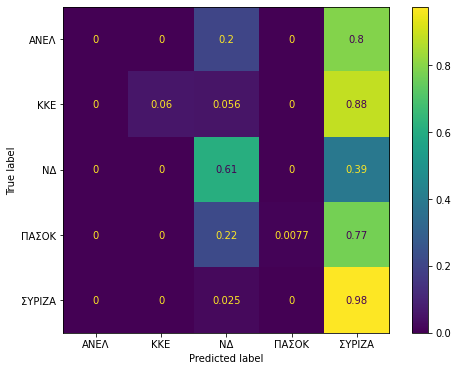

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
metrics.plot_confusion_matrix(fitted_clf, train["speech"], train["political_party"], ax=ax, normalize="true")

* A problem we notice is that due to the data being unbalanced, many speeches are classified as "ΣΥΡΙΖΑ" speeches (and some as "ΝΔ" speeches) despite belonging to another party. The imbalanced data also causes some parties to have (almost) no speeches classificated as belonging to them.
* To solve this, we'll try two solutions. 
    * The first is to resample our training dataset. We could either create copies of the undersampled categories or delete instances of the over-represented categories. We'll use a mix of these two choices.
    * The second is to either "break" the large categories into smaller ones. For example break "ΣΥΡΙΖΑ" into "ΣΥΡΙΖΑ-ΚΥΒ" (κυβέρνηση) and "ΣΥΡΙΖΑ-ΑΝΤ" (αντιπολίτευση) and do the same for "ΝΔ" and "ΠΑΣΟΚ". A variation of this solution would be to merge two smaller categories into one (for example "ΚΚΕ-ΑΝΕΛ") and then further classify the texts classified at this category. However this further variation would cause problems since these two parties don't have much in common.
* One could argue that maybe the imbalanced dataset is a problem that just this algorithm has, and we should try different algorithms first. However this a problem that is present at many algorithms, and since we're not experts in imbalanced learning we'll just try the solutions mentioned above.
* Note: The second of the proposed solutions uses the extra information of whether a party was goverment or opposition, so it could be considered cheating. For this reason the results of this solution will not be counted as the "official scores" of our algorithms.

### First proposed solution: resampling
* We create a new sample to train our algorithms. We sample the under-resepresented parties more than before and the over-sampled parties less than before.
* To see how we'll create it we first take a look at the previously used train dataset.

In [9]:
train["political_party"].value_counts()

ΣΥΡΙΖΑ    6369
ΝΔ        5100
ΠΑΣΟΚ     2478
ΚΚΕ       1241
ΑΝΕΛ       787
Name: political_party, dtype: int64

* Arbitrarily we create a new train dataset with half the speeches for "ΣΥΡΙΖΑ" and "ΝΔ", with the same number of speeches for "ΠΑΣΟΚ", 1.8 times the number of speeches for "ΚΚΕ" and for two times the number of speeches for "ΑΝΕΛ".

In [10]:
new_train = train[train["political_party"].isin(["ΑΝΕΛ", "ΚΚΕ", "ΠΑΣΟΚ"])]
tmp = train[train["political_party"]=="ΣΥΡΙΖΑ"].sample(frac=0.5)
new_train = new_train.append(tmp)
tmp = train[train["political_party"]=="ΝΔ"].sample(frac=0.5)
new_train = new_train.append(tmp)
tmp = train[train["political_party"]=="ΚΚΕ"].sample(frac=0.8)
new_train = new_train.append(tmp)
tmp = train[train["political_party"]=="ΑΝΕΛ"]
new_train = new_train.append(tmp)
new_train["political_party"].value_counts()

ΣΥΡΙΖΑ    3184
ΝΔ        2550
ΠΑΣΟΚ     2478
ΚΚΕ       2234
ΑΝΕΛ      1574
Name: political_party, dtype: int64

* We see that the number of speeches per party in our training dataset is more evenly distributed now.
* We'll try the same `Naive Bayes Classifier` as before to see if things got any better.

In [11]:
clf = Pipeline([("vect", TfidfVectorizer(strip_accents='unicode', lowercase=True, max_df=0.90, min_df=10)),
                ('nb', MultinomialNB())])
fitted_clf = clf.fit(new_train["speech"], new_train["political_party"])
fitted_clf

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.9, min_df=10,
                                 strip_accents='unicode')),
                ('nb', MultinomialNB())])

* We check the results we get for the new training dataset (again not the testing dataset):

In [12]:
predictions = fitted_clf.predict(new_train["speech"])
print(metrics.classification_report(new_train["political_party"], predictions))

              precision    recall  f1-score   support

        ΑΝΕΛ       1.00      0.20      0.33      1574
         ΚΚΕ       0.98      0.79      0.87      2234
          ΝΔ       0.88      0.49      0.63      2550
       ΠΑΣΟΚ       0.72      0.66      0.69      2478
      ΣΥΡΙΖΑ       0.49      0.96      0.65      3184

    accuracy                           0.67     12020
   macro avg       0.81      0.62      0.63     12020
weighted avg       0.78      0.67      0.65     12020



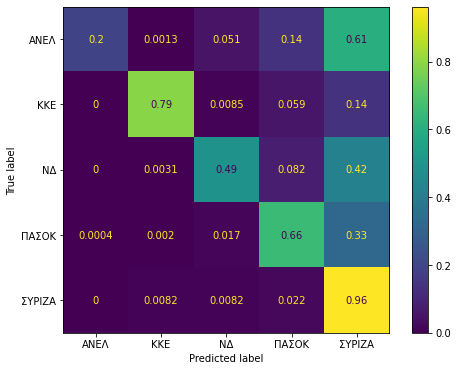

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
metrics.plot_confusion_matrix(fitted_clf, new_train["speech"], new_train["political_party"], ax=ax, normalize="true")

* And we see that things have improved but still there are many speeches of other parties classified as "ΣΥΡΙΖΑ" speeches. This percentage however is a lot lower for "ΚΚΕ" now.
* So we decide to use even less "ΣΥΡΙΖΑ" speeches.

In [14]:
new_train.drop(new_train[new_train["political_party"]=="ΣΥΡΙΖΑ"].index, inplace=True)
tmp = train[train["political_party"]=="ΣΥΡΙΖΑ"].sample(2600)
new_train = new_train.append(tmp)

* And try again (with the same algorithm):

In [15]:
clf = Pipeline([("vect", TfidfVectorizer(strip_accents='unicode', lowercase=True, max_df=0.90, min_df=10)),
                ('nb', MultinomialNB())])
fitted_clf = clf.fit(new_train["speech"], new_train["political_party"])
predictions = fitted_clf.predict(new_train["speech"])
print(metrics.classification_report(new_train["political_party"], predictions))

              precision    recall  f1-score   support

        ΑΝΕΛ       0.99      0.31      0.47      1574
         ΚΚΕ       0.95      0.84      0.89      2234
          ΝΔ       0.75      0.81      0.78      2550
       ΠΑΣΟΚ       0.61      0.91      0.73      2478
      ΣΥΡΙΖΑ       0.79      0.78      0.78      2600

    accuracy                           0.76     11436
   macro avg       0.82      0.73      0.73     11436
weighted avg       0.80      0.76      0.75     11436



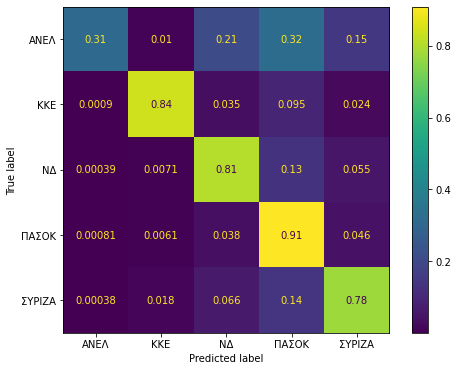

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
metrics.plot_confusion_matrix(fitted_clf, new_train["speech"], new_train["political_party"], ax=ax, normalize="true")

* Things seem to get better. But we may have overfitted.
* We'll now try different algorithms and use cross validation to find the best one. We'll use GridSearchCV to check multiple algorithms, with different combinations of parameters and to perform cross validation at the same time.
* We'll try `Multinomial Naive Bayes`, `LinearSVC` and `LogisticRegression`. We chose these algorithms because they are used for classifying texts. They also don't require any regularization (in LogisticRegression regularization is applied by default)
* The reason we try different values only for `min_df` and not for `max_df`, is due to limited resources (time).
* The following code takes quite some time to run.

In [18]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('vect', TfidfVectorizer(strip_accents='unicode', lowercase=True, max_df=0.9)),
    ('clf', MultinomialNB())])
parameters = [
    {
        'vect__min_df': (5, 10),
        'clf': (MultinomialNB(),),
        'clf__alpha': (0.5, 1.0),
        'clf__fit_prior': (True, False)
    },
    {
        'vect__min_df': (5, 10),
        'clf': (LinearSVC(),),
        'clf__penalty': ('l1', 'l2'),
        'clf__tol': (1e-3, 1e-4),
    },
    {
        'vect__min_df': (5, 10),
        'clf': (LogisticRegression(),)
    }
]
grid_search = GridSearchCV(pipeline, parameters)
best_clf = grid_search.fit(new_train["speech"], new_train["political_party"])

c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_classes.py", line 237, in fit
    self.loss, sample_weight=sample_weight)
  File "c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_ty

* And the best algorithm according to GridSearchCV is:

In [26]:
grid_search.best_estimator_

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.9, min_df=5,
                                 strip_accents='unicode')),
                ('clf', LinearSVC(tol=0.001))])

* A LinearSVC (combined with a TfidfVectorizer).
* The parameters that GridSearchCV chose are `min_df=5` for the vectorizer and `tol=0.001` for the LinearSVC.
* We now check the results we get for the train data:

In [27]:
predictions = best_clf.predict(new_train["speech"])
print(metrics.classification_report(new_train["political_party"], predictions))

              precision    recall  f1-score   support

        ΑΝΕΛ       1.00      1.00      1.00      1574
         ΚΚΕ       1.00      1.00      1.00      2234
          ΝΔ       0.99      0.99      0.99      2550
       ΠΑΣΟΚ       0.98      0.99      0.99      2478
      ΣΥΡΙΖΑ       0.99      0.99      0.99      2600

    accuracy                           0.99     11436
   macro avg       0.99      0.99      0.99     11436
weighted avg       0.99      0.99      0.99     11436



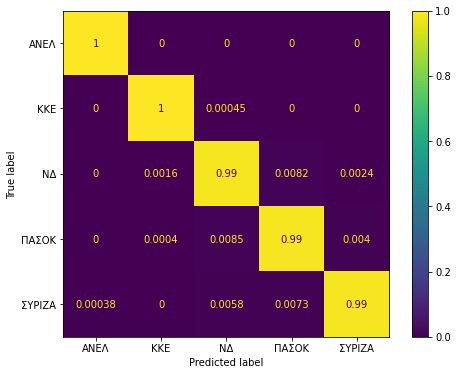

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
metrics.plot_confusion_matrix(best_clf, new_train["speech"], new_train["political_party"], ax=ax, normalize="true")

* We see that the results are very good for the train data. So good, that it may be a sign of having overfitted.
* We try predicting for the test data:

In [29]:
predictions = best_clf.predict(test["speech"])
print(metrics.classification_report(test["political_party"], predictions))

              precision    recall  f1-score   support

        ΑΝΕΛ       0.36      0.47      0.41       184
         ΚΚΕ       0.69      0.79      0.74       342
          ΝΔ       0.62      0.57      0.59      1301
       ΠΑΣΟΚ       0.43      0.54      0.48       637
      ΣΥΡΙΖΑ       0.70      0.63      0.66      1561

    accuracy                           0.60      4025
   macro avg       0.56      0.60      0.58      4025
weighted avg       0.62      0.60      0.61      4025



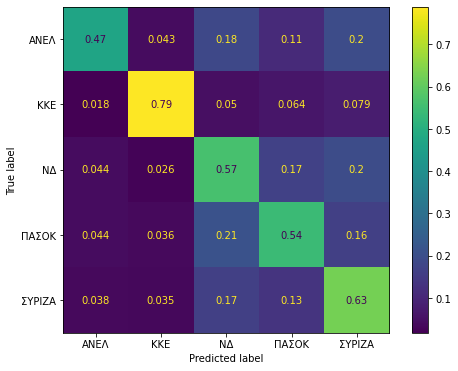

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
metrics.plot_confusion_matrix(best_clf, test["speech"], test["political_party"], ax=ax, normalize="true")

* We see that the results for the test data are quite below those for the train data (which was expected), but still good, so there's not an overfitting problem (at least not a serious one). 
* Note: The confusion matrix we plotted are normalized based on the true labels. We can try normalizing with the predicted label as well: 

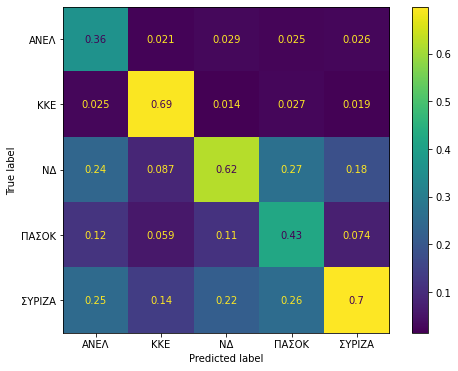

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
metrics.plot_confusion_matrix(best_clf, test["speech"], test["political_party"], ax=ax, normalize="pred")

### Comments on results
* We observe that in both confusion matrixes the results for "ΑΝΕΛ" are the worst of all. This may be due to either lack of speeches for the certain party or may indicate lack of stable rhetoric/opinions for the certain party. 
* The second explanation of the above dot, could be applied to "ΠΑΣΟΚ" too. Another reason for the low perfomance on "ΠΑΣΟΚ" speeches (and the often classification of others' speeches as "ΠΑΣΟΚ" speeches) could be that this is the most "central" party of these 5 (using the traditional left-right political spectrum).
* On the other hand "ΚΚΕ"'s speeches, which are also fewer than "ΠΑΣΟΚ", "ΝΔ" or "ΣΥΡΙΖΑ" speeches, are easier to classify. This could indicate more stable opinions/rhetoric by the certain party or more distinct opinions from the other parties.

* Since proccessing data with spaCy took quite a long time, we save the lemmatized data again to make our lives easier in the future.

In [95]:
data_vouli.to_csv("lemmatized.csv", index=False)

### Second proposed solution: breaking large categories into smaller ones
* We'll try addressing the imbalanced data problem by breaking large categories into smaller ones.
* We'll break "ΠΑΣΟΚ", "ΝΔ" and "ΣΥΡΙΖΑ" speeches into subcategories depending on whether the respective party was goverment or opposition.
* However this is using more data than those officially allowed by the assignment. So one shouldn't consider better results than before as a sign of success.
* We read the (now lemmatized) data:

In [32]:
data_vouli = pd.read_csv("lemmatized.csv")

* And create the dataset with the new categories:

In [33]:
data_vouli["new_party"] = data_vouli["political_party"]
data_vouli.loc[(data_vouli["parliamentary_period"] == 14) & (data_vouli["political_party"]=="ΠΑΣΟΚ"), 
               "new_party"] = "ΠΑΣΟΚ-ΚΥΒ"
data_vouli.loc[(data_vouli["parliamentary_period"] == 14) & (data_vouli["political_party"]=="ΝΔ"), 
               "new_party"] = "ΝΔ-ΚΥΒ"
data_vouli.loc[(data_vouli["parliamentary_period"] == 14) & (data_vouli["political_party"]=="ΣΥΡΙΖΑ"), 
               "new_party"] = "ΣΥΡΙΖΑ-ΑΝΤ"
data_vouli.loc[(data_vouli["parliamentary_period"] != 14) & (data_vouli["political_party"]=="ΠΑΣΟΚ"), 
               "new_party"] = "ΠΑΣΟΚ-ΑΝΤ"
data_vouli.loc[(data_vouli["parliamentary_period"] != 14) & (data_vouli["political_party"]=="ΝΔ"), 
               "new_party"] = "ΝΔ-ΑΝΤ"
data_vouli.loc[(data_vouli["parliamentary_period"] != 14) & (data_vouli["political_party"]=="ΣΥΡΙΖΑ"), 
               "new_party"] = "ΣΥΡΙΖΑ-ΚΥΒ"
data_vouli["new_party"].value_counts()

ΣΥΡΙΖΑ-ΚΥΒ    5510
ΝΔ-ΚΥΒ        3279
ΝΔ-ΑΝΤ        3122
ΣΥΡΙΖΑ-ΑΝΤ    2420
ΠΑΣΟΚ-ΑΝΤ     1779
ΚΚΕ           1583
ΠΑΣΟΚ-ΚΥΒ     1336
ΑΝΕΛ           971
Name: new_party, dtype: int64

* We split our data into train and test data: 

In [37]:
mask = np.random.rand(len(data_vouli)) < 0.8
train = data_vouli[mask]
test = data_vouli[~mask]
train["new_party"].value_counts()

ΣΥΡΙΖΑ-ΚΥΒ    4379
ΝΔ-ΚΥΒ        2611
ΝΔ-ΑΝΤ        2533
ΣΥΡΙΖΑ-ΑΝΤ    1908
ΠΑΣΟΚ-ΑΝΤ     1416
ΚΚΕ           1267
ΠΑΣΟΚ-ΚΥΒ     1079
ΑΝΕΛ           807
Name: new_party, dtype: int64

* The data is till imbalanced. We won't do any resampling however because the purpose of what we're doing right now is to check an alternative solution to resampling.
* We'll use the best classifier from the ones we already tested. This may not be the best for this problem, but it is used without further searching to save time.

In [38]:
more_cat_clf = Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.9, min_df=5,
                                 strip_accents='unicode')),
                ('clf', LinearSVC(tol=0.001))])
more_cat_clf.fit(train["speech"], train["new_party"])

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.9, min_df=5,
                                 strip_accents='unicode')),
                ('clf', LinearSVC(tol=0.001))])

* Let's see first how well it goes at classificating the new "parties" we created. That is the parties but also whether each of the large parties was goverment or opposittion.

In [39]:
predictions = more_cat_clf.predict(test["speech"])
print(metrics.classification_report(test["new_party"], predictions))

              precision    recall  f1-score   support

        ΑΝΕΛ       0.64      0.44      0.52       164
         ΚΚΕ       0.80      0.72      0.76       316
      ΝΔ-ΑΝΤ       0.53      0.57      0.55       589
      ΝΔ-ΚΥΒ       0.57      0.62      0.60       668
   ΠΑΣΟΚ-ΑΝΤ       0.53      0.44      0.48       363
   ΠΑΣΟΚ-ΚΥΒ       0.55      0.33      0.42       257
  ΣΥΡΙΖΑ-ΑΝΤ       0.62      0.54      0.58       512
  ΣΥΡΙΖΑ-ΚΥΒ       0.64      0.76      0.70      1131

    accuracy                           0.61      4000
   macro avg       0.61      0.55      0.57      4000
weighted avg       0.61      0.61      0.60      4000



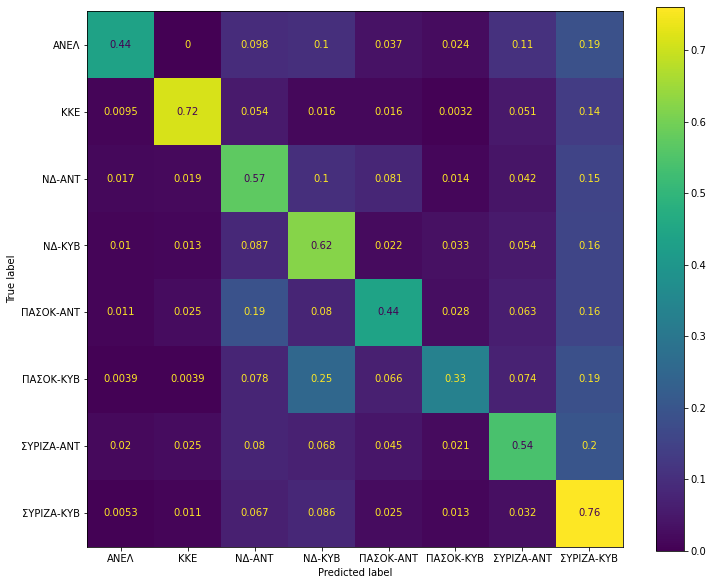

In [42]:
fig, ax = plt.subplots(figsize=(12, 10))
metrics.plot_confusion_matrix(more_cat_clf, test["speech"], test["new_party"], ax=ax, normalize="true")

* And now how well it goes at predicting the actual party:

In [44]:
for i in range(len(predictions)):
    if predictions[i]=="ΝΔ-ΑΝΤ" or predictions[i]=="ΝΔ-ΚΥΒ":
        predictions[i] = "ΝΔ"
    if predictions[i]=="ΣΥΡΙΖΑ-ΑΝΤ" or predictions[i]=="ΣΥΡΙΖΑ-ΚΥΒ":
        predictions[i] = "ΣΥΡΙΖΑ"
    if predictions[i]=="ΠΑΣΟΚ-ΑΝΤ" or predictions[i]=="ΠΑΣΟΚ-ΚΥΒ":
        predictions[i] = "ΠΑΣΟΚ"
print(metrics.classification_report(test["political_party"], predictions))

              precision    recall  f1-score   support

        ΑΝΕΛ       0.64      0.44      0.52       164
         ΚΚΕ       0.80      0.72      0.76       316
          ΝΔ       0.64      0.69      0.66      1257
       ΠΑΣΟΚ       0.59      0.44      0.51       620
      ΣΥΡΙΖΑ       0.71      0.78      0.74      1643

    accuracy                           0.68      4000
   macro avg       0.68      0.61      0.64      4000
weighted avg       0.68      0.68      0.67      4000



* We see that our scores improved.
* As a last way to check our classifiers' performance we'll see the results of a baseline classifier. We'll use scikit-learn's `DummyClassifier`.
* To be fair we'll use a resampled dataset as we did before. Since we have updated `test` data and some of them may be the same as the resampled dataset we created previously, we need to split our data again and create a new resampled dataset.

In [45]:
mask = np.random.rand(len(data_vouli)) < 0.8
train = data_vouli[mask]
test = data_vouli[~mask]
new_train = train[train["political_party"].isin(["ΑΝΕΛ", "ΚΚΕ", "ΠΑΣΟΚ"])]
tmp = train[train["political_party"]=="ΣΥΡΙΖΑ"].sample(frac=0.5)
new_train = new_train.append(tmp)
tmp = train[train["political_party"]=="ΝΔ"].sample(frac=0.5)
new_train = new_train.append(tmp)
tmp = train[train["political_party"]=="ΚΚΕ"].sample(frac=0.8)
new_train = new_train.append(tmp)
tmp = train[train["political_party"]=="ΑΝΕΛ"]
new_train = new_train.append(tmp)
new_train["political_party"].value_counts()

ΣΥΡΙΖΑ    3152
ΝΔ        2572
ΠΑΣΟΚ     2494
ΚΚΕ       2284
ΑΝΕΛ      1526
Name: political_party, dtype: int64

* And now we check how well the `DummyClassifier` does.

In [49]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(new_train["speech"], new_train["political_party"])
dummy_preds = dummy_clf.predict(test["speech"])
print(metrics.classification_report(test["political_party"], dummy_preds))

              precision    recall  f1-score   support

        ΑΝΕΛ       0.05      0.11      0.06       208
         ΚΚΕ       0.08      0.19      0.11       314
          ΝΔ       0.31      0.22      0.26      1257
       ΠΑΣΟΚ       0.15      0.20      0.17       621
      ΣΥΡΙΖΑ       0.41      0.27      0.33      1626

    accuracy                           0.23      4026
   macro avg       0.20      0.20      0.19      4026
weighted avg       0.30      0.23      0.25      4026



* And as expected the results aren't good. This means that our algorithms do a lot better than a baseline classifier.

## Classification with a Neural Network
* Firstly, we import some modules we'll need in the future.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.utils import to_categorical

* We read the lemmatized data and add a new integer column for the party.
* Then we split into train and test data, with the same trick as before to have balanced data.

In [45]:
data_vouli = pd.read_csv("lemmatized.csv")
data_vouli['party_code'] = pd.Categorical(data_vouli['political_party'])
data_vouli['party_code'] = data_vouli.party_code.cat.codes
mask = np.random.rand(len(data_vouli)) < 0.8
temp_train = data_vouli[mask]
test = data_vouli[~mask]
train = temp_train[temp_train["political_party"].isin(["ΑΝΕΛ", "ΚΚΕ", "ΠΑΣΟΚ"])]
tmp = temp_train[temp_train["political_party"]=="ΣΥΡΙΖΑ"].sample(frac=0.5)
train = train.append(tmp)
tmp = temp_train[temp_train["political_party"]=="ΝΔ"].sample(frac=0.5)
train = train.append(tmp)
tmp = temp_train[temp_train["political_party"]=="ΚΚΕ"].sample(frac=0.8)
train = train.append(tmp)
tmp = temp_train[temp_train["political_party"]=="ΑΝΕΛ"]
train = train.append(tmp)
train["party_code"].value_counts()

4    3168
2    2552
3    2496
1    2272
0    1562
Name: party_code, dtype: int64

* We further split training data into proper training data and validation data.

In [46]:
mask = np.random.rand(len(train)) < 0.8
prop_train = train[mask]
validation = train[~mask]

* Afterwards we convert the columns of the `Dataframes` to `Datasets`. This is done because tensorflow works with `Dataset` objects.
* We create three datasets. One for train, one for validation and one for test data.

In [47]:
target = prop_train.pop("party_code")
ind_var = prop_train.pop("speech")
train_ds = tf.data.Dataset.from_tensor_slices((ind_var.values, target.values))
target = validation.pop("party_code")
ind_var = validation.pop("speech")
valid_ds = tf.data.Dataset.from_tensor_slices((ind_var.values, target.values))
target = test.pop("party_code")
ind_var = test.pop("speech")
test_ds = tf.data.Dataset.from_tensor_slices((ind_var.values, target.values))

* For the neural networks to work, we need to convert the datasets to datasets with batches.

In [48]:
batch_size = 64
train_ds = train_ds.batch(batch_size)
valid_ds = valid_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)

* Because neural networks work with vectors, matrices and tensors, we need to vectorize the texts.
* Before trying spaCy's vectorization we'll try creating our own vectorization layer.

In [123]:
vocab_size = 10000
sequence_length = 500

vectorize_layer = TextVectorization(max_tokens=vocab_size,input_shape=(1,), 
                                    output_mode='int', 
                                    output_sequence_length=sequence_length)
train_text = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

* The following is taken as it is from the presentations of the course and it is done only for perfomance reasons.

In [124]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

* We create a model with the following layers:
    * A vectorization layer (which is the vectorizer we created above).
    * An `Embedding` layer which converts vectorised texts into embedding of `embedding_dim` size.
    * A `Dropout` layer after the embedding layer (for the neural network to "forget" some of the stuff it learned and avoid overfitting).
    * A `GlobalAveragePooling1D` layer to average the word embeddings of each speech (this way summarising the speeches)
    * Anonther `Dropout` layer.
    * And finally a `Dense` layer with 5 outputs (since there are 5 possible categories for each speech).

In [125]:
embedding_dim = 32

model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=vocab_size, 
                              output_dim=embedding_dim),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5)])

model.summary()
# for layer in model.layers:
#     print(layer.input_shape)
#     print(layer.output_shape)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_8 (TextVe (None, 500)               0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
dropout_32 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
global_average_pooling1d_17  (None, 32)                0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 165       
Total params: 320,165
Trainable params: 320,165
Non-trainable params: 0
_______________________________________________

* We compile our model:

In [126]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics="sparse_categorical_accuracy")

* And fit it using the training and validation data:

In [127]:
ep = 20
history = model.fit(train_ds, validation_data=valid_ds, epochs=ep)

Epoch 1/20
151/151 [==============================] - 7s 47ms/step - loss: 4.5060 - sparse_categorical_accuracy: 0.3583 - val_loss: 3.8189 - val_sparse_categorical_accuracy: 0.2225
Epoch 2/20
151/151 [==============================] - 7s 46ms/step - loss: 2.3355 - sparse_categorical_accuracy: 0.1887 - val_loss: 1.5381 - val_sparse_categorical_accuracy: 0.2585
Epoch 3/20
151/151 [==============================] - 7s 46ms/step - loss: 1.6031 - sparse_categorical_accuracy: 0.2016 - val_loss: 1.5302 - val_sparse_categorical_accuracy: 0.3448
Epoch 4/20
151/151 [==============================] - 7s 46ms/step - loss: 1.5776 - sparse_categorical_accuracy: 0.2279 - val_loss: 1.5053 - val_sparse_categorical_accuracy: 0.3274
Epoch 5/20
151/151 [==============================] - 7s 46ms/step - loss: 1.5466 - sparse_categorical_accuracy: 0.2519 - val_loss: 1.4800 - val_sparse_categorical_accuracy: 0.3303
Epoch 6/20
151/151 [==============================] - 7s 48ms/step - loss: 1.5301 - sparse_cate

* We now evaluate it to the test dataset.

In [128]:
accuracy = model.evaluate(test_ds)
print(accuracy)

63/63 [==============================] - 1s 18ms/step - loss: 2.2091 - sparse_categorical_accuracy: 0.4146
[2.209054470062256, 0.4146159589290619]


* We observe a higher accuracy than in the validation data. This may be a result of using balanced data for training and validation and imbalanced data for the testing.
* So we'll create a classification report same as the one used above for the traditional machine learning algorithms.

In [146]:
from sklearn import metrics

predictions = model.predict(test_ds)
new_preds = np.argmax(predictions, axis=1)
codes = {0: 'ΑΝΕΛ', 1: 'ΚΚΕ', 2: 'ΝΔ', 3:'ΠΑΣΟΚ', 4:'ΣΥΡΙΖΑ'}
tlist = list(target)
pred_party = []
target_party = []
x=0
for i in np.arange(len(new_preds)):
    pred_party.append(codes.get(new_preds[i]))
    target_party.append(codes.get(tlist[i]))
print(metrics.classification_report(target_party, pred_party))

              precision    recall  f1-score   support

        ΑΝΕΛ       0.57      0.18      0.28       190
         ΚΚΕ       0.82      0.56      0.67       321
          ΝΔ       0.36      0.99      0.53      1298
       ΠΑΣΟΚ       1.00      0.00      0.01       619
      ΣΥΡΙΖΑ       0.81      0.10      0.19      1595

    accuracy                           0.41      4023
   macro avg       0.71      0.37      0.33      4023
weighted avg       0.69      0.41      0.31      4023



* It seems weird having such an accuracy for "ΠΑΣΟΚ". We plot the confusion diagram normalized by true labels:

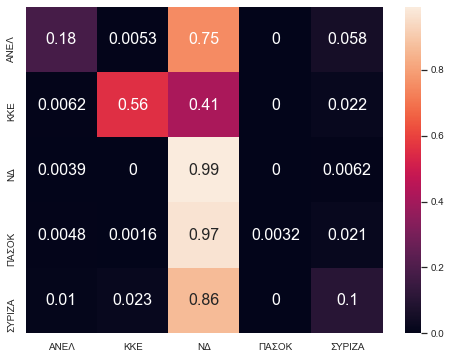

In [175]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(8, 6))
parties = ["ΑΝΕΛ", "ΚΚΕ", "ΝΔ", "ΠΑΣΟΚ", "ΣΥΡΙΖΑ"]
conf_mat = metrics.confusion_matrix(target_party, pred_party, normalize="true")
df_cm = pd.DataFrame(conf_mat, range(5), range(5))
sn.set(font_scale=0.9)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=parties, yticklabels=parties)
plt.show()

* And print the confusion diagram:

In [177]:
metrics.confusion_matrix(target_party, pred_party)

array([[  35,    1,  143,    0,   11],
       [   2,  179,  133,    0,    7],
       [   5,    0, 1285,    0,    8],
       [   3,    1,  600,    2,   13],
       [  16,   36, 1376,    0,  167]], dtype=int64)

* An obvious problem here is that too many speeches of other parties are categorized as "ΝΔ" and also that too few are categorized as "ΠΑΣΟΚ".
* Since the results above are a result of different combinations of parameters (embedding dimensions for the embedding layer and sequence length and vocabulary size for the vectorization layer etc.) on our network, we'll try using a word2vec representation for the texts to get better results. We'll also try using more "ΠΑΣΟΚ" speeches and less "ΝΔ" speeches for training and validating, as these two were the problematic categories (underclassifying and overclassifying speeches for the two parties respectively).
* We'll also try using more data. So we're reading `greek_parliament_shorter.csv`:

In [3]:
data_vouli = pd.read_csv("greek_parliament_shorter.csv")

In [4]:
data_vouli[data_vouli["parliamentary_period"]>=14]["political_party"].value_counts()

ΣΥΡΙΖΑ    26694
ΝΔ        21398
ΠΑΣΟΚ     10536
ΚΚΕ        5353
ΑΝΕΛ       3241
ΛΑΟΣ         65
Name: political_party, dtype: int64

* We delete "ΛΑΟΣ" speeches since they are too few, and split our data into training and testing.
* For the training data we sample fewer speeches from larger parties to have a more balanced training dataset.

In [5]:
data_vouli.drop(data_vouli[data_vouli["parliamentary_period"]<14].index, inplace = True)
data_vouli.drop(data_vouli[data_vouli["political_party"]=="ΛΑΟΣ"].index, inplace = True)
data_vouli['party_code'] = pd.Categorical(data_vouli['political_party'])
data_vouli['party_code'] = data_vouli.party_code.cat.codes
mask = np.random.rand(len(data_vouli)) < 0.8
temp_train = data_vouli[mask]
test = data_vouli[~mask]
train = temp_train[temp_train["political_party"].isin(["ΑΝΕΛ", "ΚΚΕ"])]
tmp = temp_train[temp_train["political_party"]=="ΣΥΡΙΖΑ"].sample(frac=0.5)
train = train.append(tmp)
tmp = temp_train[temp_train["political_party"]=="ΝΔ"].sample(frac=0.5)
train = train.append(tmp)
tmp = temp_train[temp_train["political_party"]=="ΠΑΣΟΚ"].sample(frac=0.8)
train = train.append(tmp)
train["political_party"].value_counts()

ΣΥΡΙΖΑ    10674
ΝΔ         8554
ΠΑΣΟΚ      6766
ΚΚΕ        4224
ΑΝΕΛ       2611
Name: political_party, dtype: int64

* And we use spacy to vectorize the texts. We use it to train and test data separately, to avoid converting to tokens vectorizing all the speeches (since we have thrown away some).

In [6]:
import spacy
nlp = spacy.load("el_core_news_sm")

In [8]:
train_text_tockens = list(nlp.pipe(train["speech"]))
train_vectors = [text.vector for text in train_text_tockens]
train["vect_speech"] = train_vectors
del train_text_tockens

In [9]:
test_text_tockens = list(nlp.pipe(test["speech"]))
test_vectors = [text.vector for text in test_text_tockens]
test["vect_speech"] = test_vectors
del test_text_tockens

c:\users\michv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


* As we did before, we split train data into proper train and validation data and create datasets (as keras works with datasets and not dataframes)

In [224]:
mask = np.random.rand(len(train)) < 0.8
prop_train = train[mask]
validation = train[~mask]
train_copy = prop_train.copy()
target = train_copy.pop("party_code")
ind_var = tf.convert_to_tensor(np.array(prop_train["vect_speech"].tolist()), dtype=tf.float32)
train_ds = tf.data.Dataset.from_tensor_slices((ind_var, target.values))
val_copy = validation.copy()
target = val_copy.pop("party_code")
ind_var = tf.convert_to_tensor(np.array(validation["vect_speech"].tolist()), dtype=tf.float32)
valid_ds = tf.data.Dataset.from_tensor_slices((ind_var, target.values))
test_copy = test.copy()
target = test_copy.pop("party_code")
ind_var = tf.convert_to_tensor(np.array(test["vect_speech"].tolist()), dtype=tf.float32)
test_ds = tf.data.Dataset.from_tensor_slices((ind_var, target.values))
batch_size = 8
train_ds = train_ds.batch(batch_size)
valid_ds = valid_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)

* And create a model similar to the one used above. 

In [225]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [226]:
dense_dim = 64
in_dim = len(np.array(test["vect_speech"].tolist())[0])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(dense_dim, activation='elu',
                 input_shape=(in_dim,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(dense_dim),
    tf.keras.layers.Dense(5)
])

model.summary()
# for layer in model.layers:
#     print(layer.input_shape)
#     print(layer.output_shape)

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 64)                6208      
_________________________________________________________________
dropout_113 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_198 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_199 (Dense)            (None, 5)                 325       
Total params: 10,693
Trainable params: 10,693
Non-trainable params: 0
_________________________________________________________________


* We compile it:

In [227]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics="sparse_categorical_accuracy")

* And fit it to the data:

In [228]:
ep = 10
history = model.fit(train_ds, validation_data=valid_ds, epochs=ep)

Epoch 1/10
3282/3282 [==============================] - 4s 1ms/step - loss: 7.9416 - sparse_categorical_accuracy: 0.4056 - val_loss: 8.2353 - val_sparse_categorical_accuracy: 0.2235
Epoch 2/10
3282/3282 [==============================] - 4s 1ms/step - loss: 8.8135 - sparse_categorical_accuracy: 0.3595 - val_loss: 10.8432 - val_sparse_categorical_accuracy: 0.3273
Epoch 3/10
3282/3282 [==============================] - 4s 1ms/step - loss: 10.8831 - sparse_categorical_accuracy: 0.3246 - val_loss: 10.8428 - val_sparse_categorical_accuracy: 0.3273
Epoch 4/10
3282/3282 [==============================] - 3s 1ms/step - loss: 10.8830 - sparse_categorical_accuracy: 0.3245 - val_loss: 10.8428 - val_sparse_categorical_accuracy: 0.3273
Epoch 5/10
3282/3282 [==============================] - 4s 1ms/step - loss: 10.8844 - sparse_categorical_accuracy: 0.3247 - val_loss: 10.8426 - val_sparse_categorical_accuracy: 0.3273
Epoch 6/10
3282/3282 [==============================] - 4s 1ms/step - loss: 10.8847

* We see that it quickly stops learning

In [229]:
accuracy = model.evaluate(test_ds)
print(accuracy)

1685/1685 [==============================] - 1s 751us/step - loss: 9.7218 - sparse_categorical_accuracy: 0.3968
[9.721783638000488, 0.39683836698532104]


* And that it classifies everything as one certain party:

In [230]:
from sklearn import metrics

predictions = model.predict(test_ds)
new_preds = np.argmax(predictions, axis=1)
codes = {0: 'ΑΝΕΛ', 1: 'ΚΚΕ', 2: 'ΝΔ', 3:'ΠΑΣΟΚ', 4:'ΣΥΡΙΖΑ'}
tlist = list(target)
pred_party = []
target_party = []
x=0
for i in np.arange(len(new_preds)):
    pred_party.append(codes.get(new_preds[i]))
    target_party.append(codes.get(tlist[i]))
print(metrics.classification_report(target_party, pred_party))

              precision    recall  f1-score   support

        ΑΝΕΛ       0.00      0.00      0.00       630
         ΚΚΕ       0.00      0.00      0.00      1129
          ΝΔ       0.00      0.00      0.00      4290
       ΠΑΣΟΚ       0.00      0.00      0.00      2078
      ΣΥΡΙΖΑ       0.40      1.00      0.57      5347

    accuracy                           0.40     13474
   macro avg       0.08      0.20      0.11     13474
weighted avg       0.16      0.40      0.23     13474



## Commenting
* We saw that using the ready text vectorization didn't solve the problem. Instead we got much better results using our own vectorization layer inside the neural network.
* Maybe this is due to text vectorization being done on whole texts (and not word by word) whereas the vectorization layer of the neural network used the lemmatization that was done word by word before feeding the text to the neural network.
* We also saw that even though neural networks are more complicated and sophisticated architectures, they don't always work better (or their user (in this occasion me) can't make them work better) than non neural network machine learning algorithms.

## Speech Generation
* We'll create a speech generator, that takes a name of a party and generates a speech that could have been given by the certain party.
* We'll use a simple n-gramm model for this task.
* Firstly we read the data for all the parties (speeches of at least some size(in characters)).

In [4]:
data_vouli = pd.read_csv("greek_parliament_shorter.csv")
data_vouli["political_party"].value_counts()

ΠΑΣΟΚ          127487
ΝΔ             120061
ΣΥΡΙΖΑ          34620
ΚΚΕ             21545
Συνασπισμος     13623
ΛΑΟΣ             7947
ΑΝΕΛ             3509
ΔΗΚΚΙ            3449
Name: political_party, dtype: int64

* And keep only the top-4 parties for which we have plenty of speeches.
* We'll keep only 15 thousand speeches for each of the 4 parties we end up with.

In [13]:
data_vouli.drop(data_vouli[data_vouli["political_party"].isin(["Συνασπισμος", "ΛΑΟΣ", "ΑΝΕΛ", "ΔΗΚΚΙ"])].index, 
                inplace=True)
temp1 = data_vouli[data_vouli["political_party"] == 'ΚΚΕ'].sample(15000)
temp2 = data_vouli[data_vouli["political_party"] == 'ΝΔ'].sample(15000)
temp3 = data_vouli[data_vouli["political_party"] == 'ΠΑΣΟΚ'].sample(15000)
temp4 = data_vouli[data_vouli["political_party"] == 'ΣΥΡΙΖΑ'].sample(15000)
new_data = temp1.append(temp2)
new_data = new_data.append(temp3)
new_data = new_data.append(temp4)
del data_vouli, temp1, temp2, temp3, temp4
new_data["political_party"].value_counts()

ΝΔ        15000
ΣΥΡΙΖΑ    15000
ΚΚΕ       15000
ΠΑΣΟΚ     15000
Name: political_party, dtype: int64

* And import ntlk, which we will use to find n-grams.

In [15]:
import nltk
from nltk import ngrams

* We use nltk to create 3-grams for each of the 4 parties' speeches.

In [37]:
n = 3
codes = {"ΚΚΕ": 0, "ΝΔ": 1, "ΠΑΣΟΚ": 2, "ΣΥΡΙΖΑ": 3}
parties = ["ΚΚΕ", "ΝΔ", "ΠΑΣΟΚ", "ΣΥΡΙΖΑ"]
n_grams = [0, 0, 0, 0]
for i in range(4):
    sentences = new_data["speech"][new_data["political_party"]==parties[i]].tolist() 
    sentence = set(sentences)
    n_grams[i] = [item for sent in sentence for n in range(2, 4) for item in ngrams(sent.split(), n)]

* We create a function that takes as imput a party `name` a starting word `start` and a disired `size` for the speech and produces a speech of `size+1` words (the starting word and `size` others) for the desired party.
* Although above we created tri-grams, we decided that it's better to use only the last word to to produce a speech. This is done because each tri-gram would be very rare.
* The way we produce speeches is simple: We just choose randomly one of the words that can follow the current word and append it to the speech. If a word $w_2$ follows $w_1$ 5 times in the speeches and $w_3$ follows $w_1$ one time, then $w_2$ is 5 times more likely to be put after $w_1$ in the produced speech than $w_3$

In [39]:
from random import choice

def r_first_word(my_sample):
    choices = []
    for x in my_sample:
        choices.append(x[0])
    return choice(choices)

def produce(name, start, size = 100):
    text = start+" "
    i = codes.get(name)
    to_use = n_grams[i]
    current = start
    for i in range(size):
        to_sample = []
        for x in to_use:
            if x[0]==current:
                to_sample.append(x[1])
        if len(to_sample)==0:
            next_word = r_first_word(to_use)
        else:
            next_word = choice(to_sample)
        text += next_word
        text += " "
        current = next_word
    return text

* And here we can see some examples of text productions:

In [40]:
produce("ΚΚΕ", "Καλημέρα")

'Καλημέρα σε συνέδρια για τις αποδοχές των ενεργειακών εταιρειών -το ένα πράγμα: «Θέλετε δουλειά; Όσον αφορά το πρόβλημα. Και μετά ερχόταν μία διαφήμιση από την άλλη μια πολιτική τους επιχειρηματικούς ομίλους τεράστια προβλήματα λειψυδρίας, αυτό που πλούτισε ο πατριωτισμός σήμερα έχει επιδεινωθεί όλο και την ταυτότητά του. Τρίτον, δεν φαίνεται και το ιερό της υγείας αυξάνονται, τα παίρνουν ενισχύσεις κλπ. είναι ίδια επαρχία με την παραχώρηση. Τους λέτε ότι θα αποκρατικοποιηθούν. Γιατί το κεφάλαιο, όχι οι φτωχομεσαίοι κτηνοτρόφοι της πολιτικής- και διατάξεων και ευέλικτες και χάνονται πίσω από δασκάλους. Θα δει τη γυναίκα, ώστε να ενημερώσεις που προωθήθηκαν, τα τέσσερις χιλιάδες '

In [41]:
produce("ΝΔ", "Κύριε")

'Κύριε Πρόεδρε, με τη ζωή του, άρα συνιστούν μεταβίβαση οχημάτων. Εντατικοποίηση καθαρισμών σε ό,τι αφορά την απλή ιστορική φράση "με πλήρη φάκελο. Και βασίζεται σε επισφαλή θέση στην Υγεία έχουν νόμιμη διαχείριση.Σήμερα, άκουσα τον αντίδικό του μέσου μεταφοράς. Είναι μια τουριστική νομοθεσία ανάθεσης των συνόρων μετανάστη με στόχο τη λειτουργία και δεν καταλαβαίνει τι λέει ο οποίος απειλείται από το Γ’ Λυκείου, όσους ψήφισαν την απόφαση για την απόδοση του Βόλου, ενώ τα ρυθμίζει το 2010 και έξω τα λεφτά και της ελευθερίας εξουσίας λειτουργεί ως μηχανισμό επιβολής προστίμων και αγρότες, οι άλλες –και κλείνω με τη φετινή είναι ανάγκη ευθύς '

In [42]:
produce("ΠΑΣΟΚ", "Ανδρέας")

'Ανδρέας Παπανδρέου, τότε να κάνουμε ενιαία άποψη ως προς το θέμα είναι οικείος δήμος των προθεσμιών και την αποκατάσταση του θέματος, κύριε Πρόεδρε, νομίζω ότι ο Ρήγας στον ελληνικό εκπαιδευτικό μας ενημερώσει εδώ στη τοποθέτησή μου. Επίσης, εμφανίζει ότι είναι ανώτατα δικαστήρια. Γιατί δεν θυμίζει ο κύριος Υπουργός Επικρατείας. Και θα τελειώσω με τα οποία εμπεριέχονται, θα εξυγίαναν το δημόσιο συμφέρον της δημόσιας εκπαίδευσης, σύμφωνα με όσα δεν ταυτίζονται ως κρυπτόμενοι», δηλαδή των δράσεών μας παρουσίας της παραγράφου 2, 2,5 δισ. περίπου στα οποία έχει τις συνθήκες, να διευκρινιστεί, λόγω των τριών εκατομμυρίων δραχμών. Θα πρέπει να καταργήσουμε το πρωί εδώ '

In [43]:
produce("ΣΥΡΙΖΑ", "Ο")

'Ο Αυγουστίνος, μια σειρά παρεμβάσεων δημοσιονομικής διόρθωσης. Τέλειωσαν αυτά, το κράτος που έχει μόνιμους υπαλλήλους τους μετόχους, δεν πουλάμε το 50% περικοπές είναι αντισυνταγματική η Κυβέρνηση τα οποία εξήγγειλε ξέρει να μιλάνε για να προστατεύσει το άνοιγμα περιοχών μας είναι τα οποία θα δημιουργήσουν μέχρι τις αξίες των μεγάλων κομμάτων, γιατί, όπως ξέρετε, το 2006 του είδους σχεδιασμοί εφήμερης προοπτικής των σχολείων, καθώς και κύριοι της λειτουργίας αλλά κυρίως δεν λένε ότι εμείς, ο οποίος οφείλει το χαρακτηρίζατε εσείς και καταστροφές. Να μη τους χαρίζουμε αυτήν τη μέγιστη πολιτική των λιμανιών, μέσα στο έγγραφό της βαθιάς κρίσης, την είδα. Ξανακοίταξα το '

* This is not the most sophisticated way to generate texts. Most complex ways of text generation are based on neural networks. This is just a simple example using ngrams.